In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

2023-01-27 18:37:21.203814: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Flatten

In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 400s 2us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
classes =["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32,kernel_size = (3,3),activation ='relu',input_shape = (32,32,3)))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(filters = 64,kernel_size = (3,3),activation ='relu'))
model.add(keras.layers.MaxPool2D((2,2)))




model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation ="relu"))
model.add(keras.layers.Dense(10,activation ="softmax"))

2023-01-27 19:15:20.330656: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [11]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer="adam",metrics = ["accuracy"])

In [12]:
model_history = model.fit(X_train,y_train,epochs=10)

2023-01-27 19:17:45.527437: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.4684 - accuracy: 0.4748
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1252 - accuracy: 0.6034
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0051 - accuracy: 0.6504
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9185 - accuracy: 0.6811
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8544 - accuracy: 0.7035
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8025 - accuracy: 0.7195
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7468 - accuracy: 0.7409
Epoch 8/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7080 - accuracy: 0.7532
Epoch 9/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6656 - accuracy: 0.7678
Epoch 10/10
1563/1563 [==============================] - 29s 18m

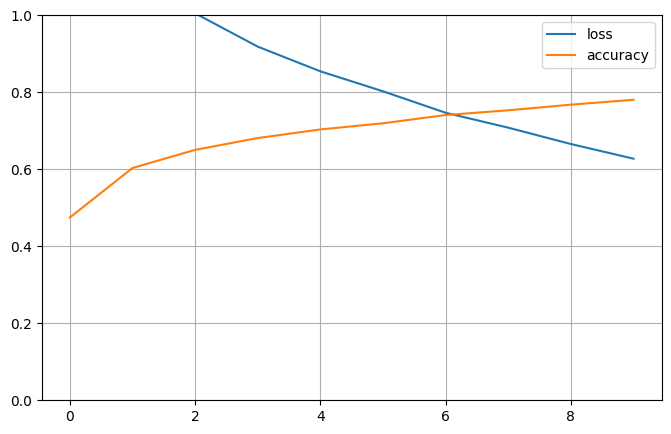

In [13]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
ev = model.evaluate(X_test,y_test)

2023-01-27 19:23:57.726422: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 5ms/step - loss: 0.9457 - accuracy: 0.6832


In [15]:
X_new = X_test[:5]

In [16]:
Y_pred = model.predict(X_new)
Y_pred

1/1 [==============================] - 0s 88ms/step


array([[5.2610412e-03, 2.8413711e-05, 1.5907345e-02, 9.2857188e-01,
        3.9628151e-04, 1.7536135e-02, 7.9329312e-03, 6.8575755e-05,
        2.4281947e-02, 1.5404983e-05],
       [2.2932715e-03, 5.8410007e-01, 2.2765718e-07, 6.4128261e-07,
        3.1310581e-08, 1.2018322e-09, 1.1987370e-09, 4.3087724e-09,
        4.0185252e-01, 1.1753207e-02],
       [1.9311796e-01, 1.3996324e-01, 1.2470811e-02, 2.3965960e-02,
        3.3048645e-03, 2.7067740e-03, 5.7202706e-04, 4.3161721e-03,
        4.6921900e-01, 1.5036315e-01],
       [7.0314455e-01, 1.6906662e-02, 3.4906492e-02, 6.6451961e-04,
        4.8005218e-03, 5.6001751e-05, 2.3096174e-04, 2.0977847e-04,
        2.3772843e-01, 1.3520318e-03],
       [4.4936050e-06, 4.5517914e-05, 8.0860510e-02, 3.3227926e-01,
        4.0080261e-01, 3.1110138e-02, 1.5267608e-01, 8.1053849e-06,
        2.2094878e-03, 3.7272980e-06]], dtype=float32)

AxesImage(size=(32, 32))


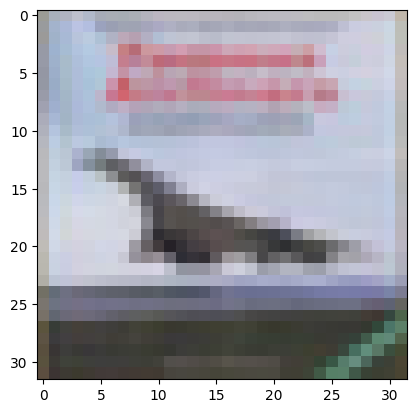

In [19]:
print(plt.imshow(X_test[3]))